In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
import datetime
import json
import random

In [3]:
#----- server event ---------
server_event = pd.read_csv('server_event.csv',header=None)
column_names = ['timestamp','machine_id','event_type','event_detail','capacity:CPU','capacity:memory','capacity:disk']
server_event.columns = column_names
#---- batch instance ---------
batch_instance = pd.read_csv('batch_instance.csv', header=None)
column_names = ['start_timestamp','end_timestamp','job_id','task_id','machine_id','status','seq_no','total_seq_no','real_cpu_max','real_cpu_avg','real_mem_max','real_mem_avg']
batch_instance.columns = column_names
#---- batch task --------
batch_task = pd.read_csv('batch_task.csv',header=None)
column_names = ['create_timestamp','modify_timestamp','job_id','task_id','instance_num','status','plan_cpu_per_instance','plan_mem']
batch_task.columns = column_names

# carbon_intensity_202208

In [4]:
df = pd.read_csv('carbon_intensity_202208.csv')

In [ ]:
df

## (a) assume these 12 hours take place during a weekday

### weekday day-time (8:00 - 20:00)

In [351]:
# Function to check if a given date-time is a weekday daytime
def is_weekday_daytime(dt_str):
    # Parse the date-time string to a datetime object
    dt_obj = datetime.datetime.fromisoformat(dt_str[:-1])
    # Check if it's a weekday (0: Monday, 4: Friday) and daytime (between 8 AM and 18 PM)
    return dt_obj.weekday() >= 0 and dt_obj.weekday() <= 4 and 8 <= dt_obj.hour < 20

In [352]:
# Filter the DataFrame to get only entries that are weekday daytime
weekday_daytime_entries = df[df['from'].apply(is_weekday_daytime)]

In [353]:
def random_data_for_day(df):
    # Get unique dates from the 'from' column
    unique_dates = df['from'].str.split('T', expand=True)[0].unique()
    # Randomly select one date from the unique dates
    random_date = random.choice(unique_dates)
    # Filter DataFrame for the selected date
    day_entries = df[df['from'].str.contains(random_date)]
    return day_entries

# Get randomly selected data for one day
random_day_data = random_data_for_day(weekday_daytime_entries)

/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/1249373498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_day_data['from'] = pd.to_datetime(random_day_data['from'])
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/1249373498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_day_data['to'] = pd.to_datetime(random_day_data['to'])


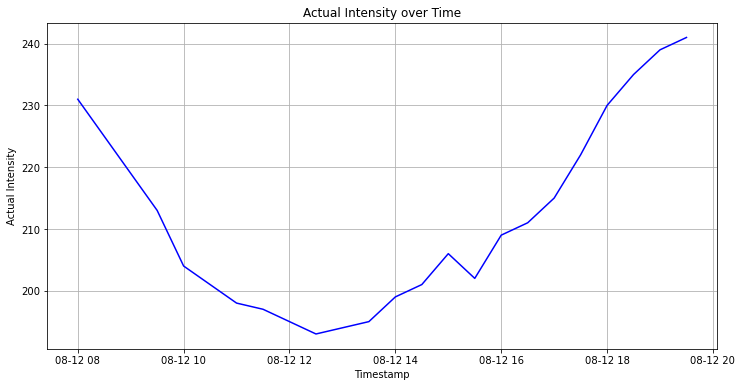

In [354]:
# Convert the timestamp columns to datetime format
random_day_data['from'] = pd.to_datetime(random_day_data['from'])
random_day_data['to'] = pd.to_datetime(random_day_data['to'])

# Plot the line chart for 'from' and 'actual_intensity'
plt.figure(figsize=(12, 6))
plt.plot(random_day_data['from'], random_day_data['actual_intensity'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Actual Intensity')
plt.title('Actual Intensity over Time')
plt.grid(True)
plt.show()


### weekday night-time (20:00 - 8:00)

In [432]:
def is_weekday_nighttime(dt_str):
    # Parse the date-time string to a datetime object
    dt_obj = datetime.datetime.fromisoformat(dt_str[:-1])
    # Check if it's a weekday (0: Monday, 4: Friday) and daytime (between 20PM and 24PM)
    return dt_obj.weekday() >= 0 and dt_obj.weekday() <= 4 and 20 <= dt_obj.hour <= 24

# Filter the DataFrame to get only entries that are weekday nighttime
weekday_nighttime_entries = df[df['from'].apply(is_weekday_nighttime)]

# Get randomly selected data for one day
random_night_data = random_data_for_day(weekday_nighttime_entries)

# Convert 'from' and 'to' columns to datetime objects
random_night_data['from'] = pd.to_datetime(random_night_data['from'])
random_night_data['to'] = pd.to_datetime(random_night_data['to'])

# Extract date from 'from' column
random_night_data['date'] = random_night_data['from'].dt.date

/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/1660046912.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_night_data['from'] = pd.to_datetime(random_night_data['from'])
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/1660046912.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_night_data['to'] = pd.to_datetime(random_night_data['to'])
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/1660046912.py:18: SettingWithCopyWarning: 
A value is tr

In [434]:
# Convert 'from' and 'to' columns to datetime objects
df['from'] = pd.to_datetime(df['from'])
df['to'] = pd.to_datetime(df['to'])

# Extract date from 'from' column
df['date'] = df['from'].dt.date

# Filter data for a specific day (e.g., 2022-08-01) from 0:00 to 8:00
specific_day_data = df[df['date'] == pd.to_datetime('2022-08-02')]

# Filter data for a specific day (e.g., '2022-08-01') from 0:00 to 8:00
specific_day_data = specific_day_data.loc[(df['from'].dt.hour >= 0) & (df['from'].dt.hour < 8)]

/Users/xuanhaoding/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [435]:
# Concatenate the two DataFrames
random_night_data = pd.concat([random_night_data, specific_day_data])

# Reset the index of the merged DataFrame
random_night_data.reset_index(drop=True, inplace=True)

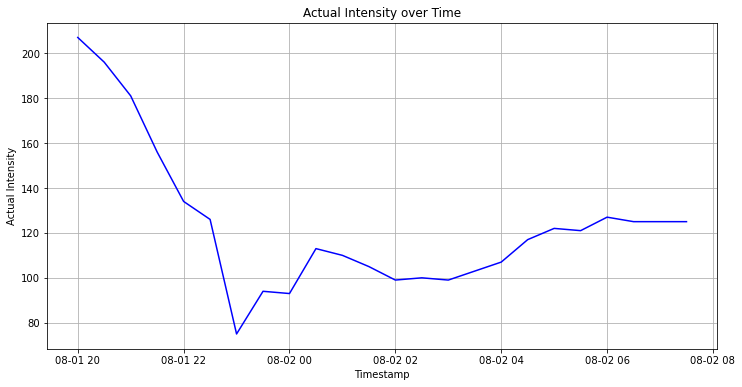

In [437]:
# Convert the timestamp columns to datetime format
random_night_data['from'] = pd.to_datetime(random_night_data['from'])
random_night_data['to'] = pd.to_datetime(random_night_data['to'])

# Plot the line chart for 'from' and 'actual_intensity'
plt.figure(figsize=(12, 6))
plt.plot(random_night_data['from'], random_night_data['actual_intensity'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Actual Intensity')
plt.title('Actual Intensity over Time')
plt.grid(True)
plt.show()

## (b) assume these 12 hours take place during a weekend

### weekend daylight 8:00 - 20:00

In [290]:
# 将'from'列和'to'列转换为Datetime类型
# df['from'] = pd.to_datetime(df['from'])
# df['to'] = pd.to_datetime(df['to'])

# 判断是否为周末（星期六或星期日）
is_weekend = (df['from'].dt.dayofweek >= 5)

# 筛选出是周末并且在8点到20点之间的数据
weekend_data = df[is_weekend & (df['from'].dt.hour >= 8) & (df['from'].dt.hour < 20)]

# 随机选择一天的数据
random_weekend_data = random.choice(weekend_data['from'].dt.date.unique())
random_weekend_data = weekend_data[weekend_data['from'].dt.date == random_weekend_data]

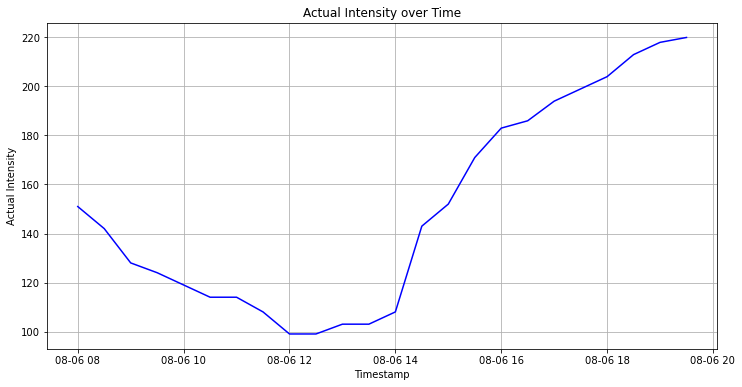

In [291]:
plt.figure(figsize=(12, 6))
plt.plot(random_weekend_data['from'], random_weekend_data['actual_intensity'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Actual Intensity')
plt.title('Actual Intensity over Time')
plt.grid(True)
plt.show()

### weekend night 08-27-20:00 - 08-28-8:00

In [8]:
# Convert 'from' and 'to' columns to datetime format with UTC timezone
df['from'] = pd.to_datetime(df['from']).dt.tz_convert('UTC')
df['to'] = pd.to_datetime(df['to']).dt.tz_convert('UTC')

# Define the start and end timestamps in UTC timezone
start_timestamp = pd.Timestamp('2022-08-27 20:00:00', tz='UTC')
end_timestamp = pd.Timestamp('2022-08-28 08:00:00', tz='UTC')

# Use boolean indexing to select the data within the specified time range
random_weekend_night_data = df[(df['from'] >= start_timestamp) & (df['to'] < end_timestamp)]

random_weekend_night_data

,from,to,forecast_intensity,actual_intensity,index,day_of_week
1290,2022-08-27 20:00:00+00:00,2022-08-27 20:30:00+00:00,259,270,high,5
1291,2022-08-27 20:30:00+00:00,2022-08-27 21:00:00+00:00,264,276,high,5
1292,2022-08-27 21:00:00+00:00,2022-08-27 21:30:00+00:00,261,279,high,5
1293,2022-08-27 21:30:00+00:00,2022-08-27 22:00:00+00:00,273,288,high,5
1294,2022-08-27 22:00:00+00:00,2022-08-27 22:30:00+00:00,268,285,high,5
1295,2022-08-27 22:30:00+00:00,2022-08-27 23:00:00+00:00,267,287,high,5
1296,2022-08-27 23:00:00+00:00,2022-08-27 23:30:00+00:00,268,286,high,5
1297,2022-08-27 23:30:00+00:00,2022-08-28 00:00:00+00:00,267,284,high,5
1298,2022-08-28 00:00:00+00:00,2022-08-28 00:30:00+00:00,260,285,high,6
1299,2022-08-28 00:30:00+00:00,2022-08-28 01:00:00+00:00,270,287,high,6


# batch task process

In [4]:
batch_instance

,start_timestamp,end_timestamp,job_id,task_id,machine_id,status,seq_no,total_seq_no,real_cpu_max,real_cpu_avg,real_mem_max,real_mem_avg
0,41562,41618,120.0,686.0,299.0,Terminated,1,1,1.50,0.29,NaN,NaN
1,41561,41619,120.0,686.0,1279.0,Terminated,1,1,0.89,0.28,NaN,NaN
2,41562,41617,120.0,686.0,828.0,Terminated,1,1,0.94,0.29,NaN,NaN
3,41561,41617,120.0,686.0,95.0,Terminated,1,1,1.00,0.31,NaN,NaN
4,41557,41610,120.0,686.0,545.0,Terminated,1,1,1.37,0.29,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16094651,73512,73514,NaN,NaN,365.0,Terminated,1,1,1.00,0.93,0.000813,0.000611
16094652,73512,73514,NaN,NaN,13.0,Terminated,1,1,1.00,0.35,0.001098,0.000906
16094653,73512,73518,NaN,NaN,421.0,Terminated,1,1,0.95,0.22,0.001512,0.000890
16094654,73512,73518,NaN,NaN,409.0,Terminated,1,1,0.93,0.25,0.001439,0.000947


In [5]:
batch_task

,create_timestamp,modify_timestamp,job_id,task_id,instance_num,status,plan_cpu_per_instance,plan_mem
0,6459,6524,3,4,15740,Terminated,50.0,0.007957
1,6457,6533,3,5,1,Terminated,50.0,0.004395
2,6036,6046,4,7,393,Waiting,NaN,NaN
3,6036,6046,4,6,452,Waiting,NaN,NaN
4,10719,11332,15,67,1705,Terminated,50.0,0.005736
...,...,...,...,...,...,...,...,...
80548,32996,33043,12935,80454,65,Terminated,50.0,0.009681
80549,32996,33061,12935,80453,69,Terminated,50.0,0.010706
80550,32996,33069,12935,80452,249,Terminated,50.0,0.007962
80551,32996,32999,12935,80457,1,Terminated,50.0,0.004059


In [6]:
batch_instance_df = batch_instance.drop(columns=['seq_no', 'total_seq_no', 'real_mem_max', 'real_mem_avg'], axis=1)

# 删除real_cpu_max字段为空的数据
batch_instance_df = batch_instance_df.dropna(subset=['real_cpu_max'])

# 筛选出有效的行，即 end_timestamp 大于等于 start_timestamp 的行
batch_instance_df = batch_instance_df[batch_instance_df['end_timestamp'] > batch_instance_df['start_timestamp']]

In [7]:
batch_instance_df

,start_timestamp,end_timestamp,job_id,task_id,machine_id,status,real_cpu_max,real_cpu_avg
0,41562,41618,120.0,686.0,299.0,Terminated,1.50,0.29
1,41561,41619,120.0,686.0,1279.0,Terminated,0.89,0.28
2,41562,41617,120.0,686.0,828.0,Terminated,0.94,0.29
3,41561,41617,120.0,686.0,95.0,Terminated,1.00,0.31
4,41557,41610,120.0,686.0,545.0,Terminated,1.37,0.29
...,...,...,...,...,...,...,...,...
16094651,73512,73514,NaN,NaN,365.0,Terminated,1.00,0.93
16094652,73512,73514,NaN,NaN,13.0,Terminated,1.00,0.35
16094653,73512,73518,NaN,NaN,421.0,Terminated,0.95,0.22
16094654,73512,73518,NaN,NaN,409.0,Terminated,0.93,0.25


In [8]:
# Group the DataFrame by 'task_id' and calculate the sum of 'real_cpu_max' for each group
sum_real_cpu_max_by_task_id = batch_instance_df.groupby('task_id')['real_cpu_max'].sum()

sum_real_cpu_max_by_task_id

task_id
1.0          277.12
2.0        14548.89
3.0            1.16
4.0        14578.45
5.0            1.95
             ...   
80549.0      131.68
80550.0      126.10
80551.0        0.62
80552.0      134.08
80553.0        0.66
Name: real_cpu_max, Length: 66607, dtype: float64

In [9]:
batch_task_df = batch_task[['create_timestamp','modify_timestamp','job_id','task_id','instance_num','status','plan_cpu_per_instance']]

# 筛选出有效的行，即 end_timestamp 大于等于 start_timestamp 的行
batch_task_df = batch_task_df[batch_task_df['modify_timestamp'] > batch_task_df['create_timestamp']]

In [10]:
batch_task_df_merged = pd.merge(batch_task_df,sum_real_cpu_max_by_task_id, on='task_id', how='inner')

# Add the new 'cpu_plan' column
batch_task_df_merged['cpu_plan'] = batch_task_df_merged['instance_num'] * batch_task_df_merged['plan_cpu_per_instance']


batch_task_df_merged

,create_timestamp,modify_timestamp,job_id,task_id,instance_num,status,plan_cpu_per_instance,real_cpu_max,cpu_plan
0,6459,6524,3,4,15740,Terminated,50.0,14578.45,787000.0
1,6457,6533,3,5,1,Terminated,50.0,1.95,50.0
2,10719,11332,15,67,1705,Terminated,50.0,3121.98,85250.0
3,10718,11164,15,66,631,Terminated,50.0,1250.68,31550.0
4,10718,10916,15,65,300,Terminated,50.0,601.17,15000.0
...,...,...,...,...,...,...,...,...,...
66574,32996,33043,12935,80454,65,Terminated,50.0,426.60,3250.0
66575,32996,33061,12935,80453,69,Terminated,50.0,477.62,3450.0
66576,32996,33069,12935,80452,249,Terminated,50.0,248.18,12450.0
66577,32996,32999,12935,80457,1,Terminated,50.0,1.50,50.0


In [11]:
# Find the minimum and maximum values of 'create_timestamp' and 'modify_timestamp'
min_timestamp = min(batch_task_df_merged['create_timestamp'].min(), batch_task_df_merged['modify_timestamp'].min())
max_timestamp = max(batch_task_df_merged['create_timestamp'].max(), batch_task_df_merged['modify_timestamp'].max())

# Generate a list of timestamps within the range
timestamps = list(range(min_timestamp, max_timestamp + 1))

# Initialize an empty DataFrame to store the results
result = pd.DataFrame({'timestamp': timestamps, 'cpu_plan': 0,'real_cpu_max':0})

# Group the data within the time intervals and calculate the sums of 'total_cpu_plan' and 'total_cpu_capacity'
for _, row in batch_task_df_merged.iterrows():
    start_time = row['create_timestamp']
    end_time = row['modify_timestamp']
    cpu_plan = row['cpu_plan']
    real_cpu_max = row['real_cpu_max']
    
    result.loc[(result['timestamp'] >= start_time) & (result['timestamp'] <= end_time), 'cpu_plan'] += cpu_plan
    result.loc[(result['timestamp'] >= start_time) & (result['timestamp'] <= end_time), 'real_cpu_max'] += real_cpu_max

In [12]:
result

,timestamp,cpu_plan,real_cpu_max
0,-1078,30000,369.59
1,-1077,30000,369.59
2,-1076,30000,369.59
3,-1075,30000,369.59
4,-1074,30000,369.59
...,...,...,...
62742,61664,99950,2264.92
62743,61665,99950,2264.92
62744,61666,99950,2264.92
62745,61667,99950,2264.92


In [13]:
full_capacity = 12000000

# Calculate the free capacity using the provided formula
result['free_capacity'] = (full_capacity - result['cpu_plan']) / full_capacity * 100

# # Assuming your data is already loaded into a DataFrame named df
# text_df['free_capacity'] = text_df['free_capacity'].apply(lambda x: max(0, x))

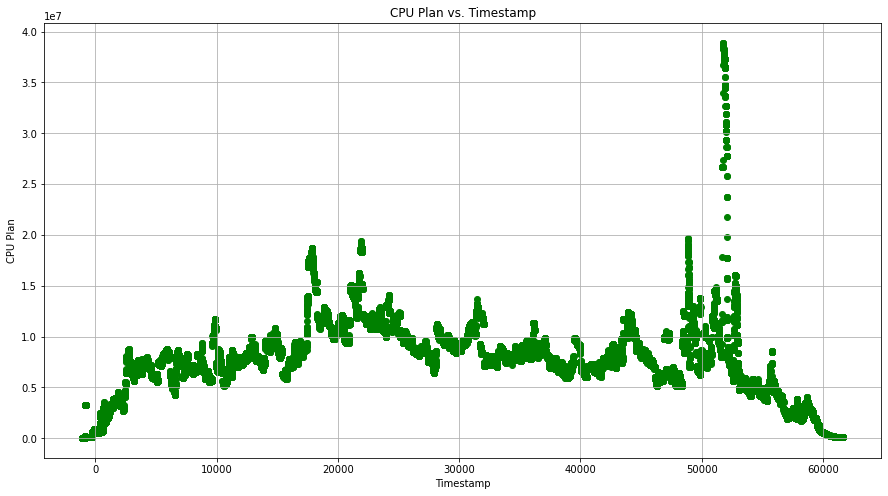

In [14]:
# Plot the CPU Plan against Timestamp using a scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(result['timestamp'], result['cpu_plan'], color='g')
plt.title('CPU Plan vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('CPU Plan')
plt.grid(True)
plt.show()

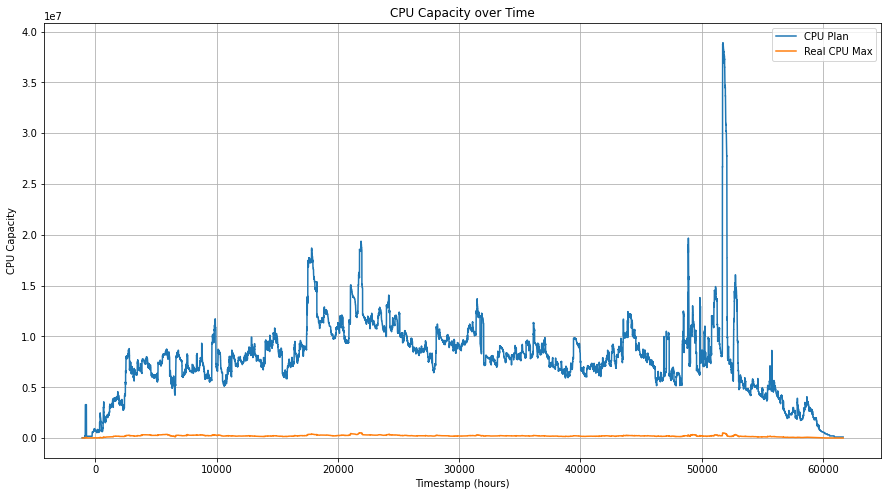

In [121]:
# Convert 'timestamp' values from seconds to hours
# text_df['timestamp'] = text_df['timestamp'] / 3600

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(result['timestamp'], result['cpu_plan'], label='CPU Plan')
plt.plot(result['timestamp'], result['real_cpu_max'], label='Real CPU Max')
plt.xlabel('Timestamp (hours)')
plt.ylabel('CPU Capacity')
plt.title('CPU Capacity over Time')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


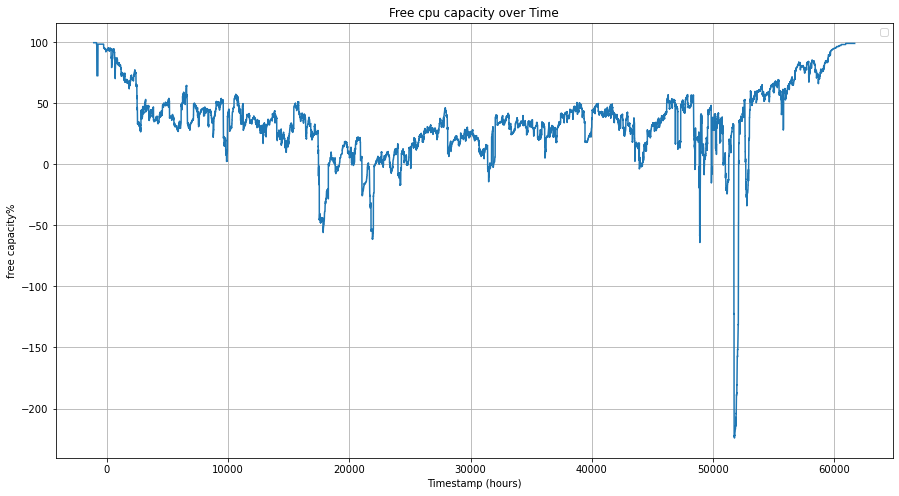

In [122]:
# Plotting
plt.figure(figsize=(15, 8))
plt.plot(result['timestamp'], result['free_capacity'])
plt.xlabel('Timestamp (hours)')
plt.ylabel('free capacity%')
plt.title('Free cpu capacity over Time')
plt.legend()
plt.grid(True)
plt.show()

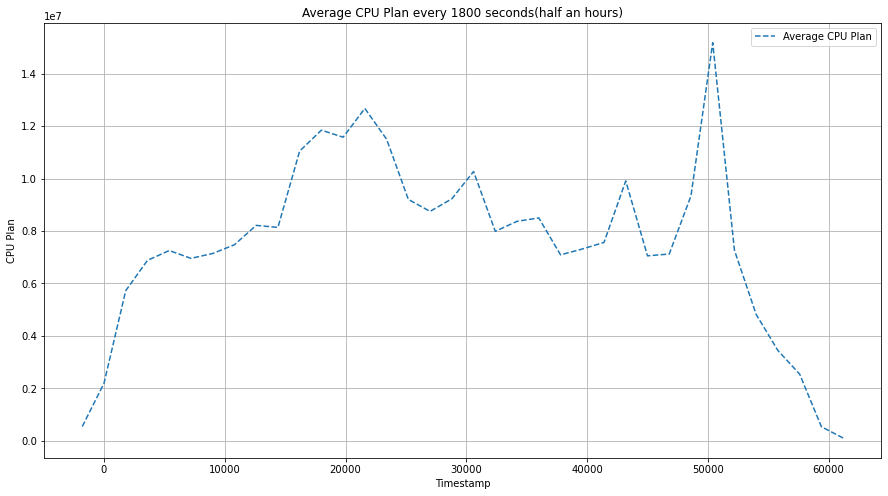

In [123]:
# Convert the 'timestamp' to positive values to simplify calculations
# result['timestamp'] = result['timestamp'].abs()

# Group the DataFrame by a 1800-second (30-minute) interval and calculate the mean of 'cpu_plan' for each group
interval = 1800
result['time_interval'] = result['timestamp'] // interval
avg_cpu_plan_by_interval = result.groupby('time_interval')['cpu_plan'].mean()

# Reset 'timestamp' to negative values for visualization (optional)
# result['timestamp'] = result['timestamp'] * -1

# Visualize the data
plt.figure(figsize=(15, 8))
plt.plot(avg_cpu_plan_by_interval.index * interval, avg_cpu_plan_by_interval.values, label='Average CPU Plan', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('CPU Plan')
plt.title('Average CPU Plan every 1800 seconds(half an hours)')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/2667560821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['timestamp'] = average_df['timestamp'].abs()
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/2667560821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['time_interval'] = average_df['timestamp'] // interval
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/2667560821.py:10: SettingWithCopyWarning: 
A value is trying to be set o

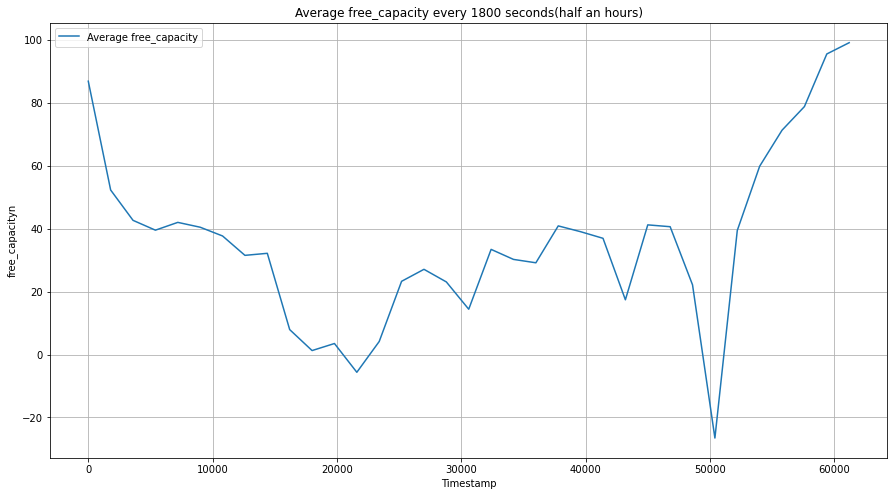

In [125]:
# Convert the 'timestamp' to positive values to simplify calculations
average_df['timestamp'] = average_df['timestamp'].abs()

# Group the DataFrame by a 1800-second (30-minute) interval and calculate the mean of 'cpu_plan' for each group
interval = 1800
average_df['time_interval'] = average_df['timestamp'] // interval
avg_cpu_plan_by_interval = average_df.groupby('time_interval')['free_capacity'].mean()

# Reset 'timestamp' to negative values for visualization (optional)
average_df['timestamp'] = average_df['timestamp'] * -1

# Visualize the data
plt.figure(figsize=(15, 8))
plt.plot(avg_cpu_plan_by_interval.index * interval, avg_cpu_plan_by_interval.values, label='Average free_capacity', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('free_capacityn')
plt.title('Average free_capacity every 1800 seconds(half an hours)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
average_df = result[['timestamp','free_capacity']]

# 将DataFrame保存为CSV文件
average_df.to_csv('average_free_capacity.csv', index=False)

## random weekday daylight (8:00 - 20:00) 

In [355]:
average_df = result[['timestamp','free_capacity']]

In [356]:
# 转换timestamp为正值
average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]

# 转换timestamp为日期时间
base_time = pd.Timestamp('2022-08-12T08:00Z')
average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]

/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/2291685861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/2291685861.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]


In [357]:
average_df

,timestamp,free_capacity,datetime
0,0,99.750000,2022-08-12 08:00:00+00:00
1,1,99.750000,2022-08-12 08:00:01+00:00
2,2,99.750000,2022-08-12 08:00:02+00:00
3,3,99.750000,2022-08-12 08:00:03+00:00
4,4,99.750000,2022-08-12 08:00:04+00:00
...,...,...,...
62742,61664,99.167083,2022-08-13 01:07:44+00:00
62743,61665,99.167083,2022-08-13 01:07:45+00:00
62744,61666,99.167083,2022-08-13 01:07:46+00:00
62745,61667,99.167083,2022-08-13 01:07:47+00:00


In [358]:
# 将datetime列设置为索引
average_df['datetime'] = pd.to_datetime(average_df['datetime'])

# 筛选出8点到20点之间的数据
average_df = average_df[(average_df['datetime'].dt.hour >= 8) & (average_df['datetime'].dt.hour < 20)]

average_df.set_index('datetime', inplace=True)

# 按照半小时间隔计算平均值
average_free_capacity = average_df['free_capacity'].resample('30T').mean()

/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/2328799209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['datetime'] = pd.to_datetime(average_df['datetime'])


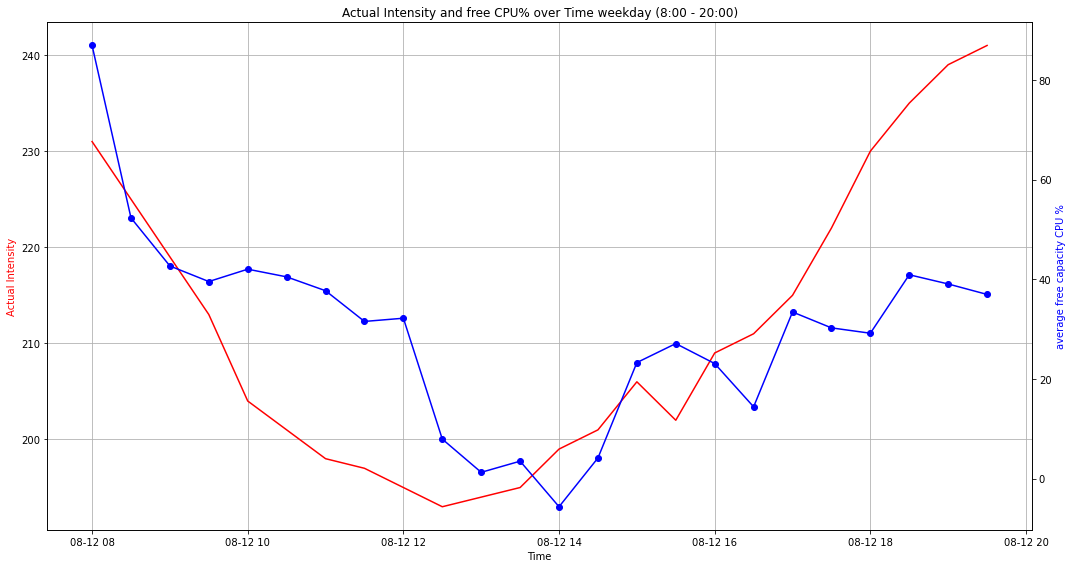

In [360]:
# Create the first plot for "Actual Intensity"
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot "Actual Intensity" on the left y-axis
ax1.plot(random_day_data['from'], random_day_data['actual_intensity'], color='r')
ax1.set_xlabel('Time')
ax1.set_ylabel('Actual Intensity', color='r')
ax1.set_title('Actual Intensity and free CPU% over Time weekday (8:00 - 20:00)')
ax1.grid(True)

# Create the second plot for "Reserved CPU%"
ax2 = ax1.twinx()



ax2.plot(average_free_capacity.index, average_free_capacity.values, marker='o',color='b')
ax2.set_ylabel('average free capacity CPU %', color='b')

# Show the combined plot
plt.tight_layout()
plt.show()

## random weekday night (20:00 - 8:00)

In [464]:
average_df = result[['timestamp','free_capacity']]

# 转换timestamp为正值
average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]

# 转换timestamp为日期时间
base_time = pd.Timestamp('2022-08-01T20:00Z')
average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]

# 将datetime列设置为索引
average_df['datetime'] = pd.to_datetime(average_df['datetime'])

average_df.set_index('datetime', inplace=True)

end_time = pd.Timestamp('2022-08-02 07:30:00')
average_df = average_df.loc[:end_time]
# 按照半小时间隔计算平均值
average_free_capacity = average_df['free_capacity'].resample('30T').mean()

/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/685879103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/685879103.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/6858791

In [465]:
average_df

,timestamp,free_capacity
datetime,,
2022-08-01 20:00:00+00:00,0,99.750000
2022-08-01 20:00:01+00:00,1,99.750000
2022-08-01 20:00:02+00:00,2,99.750000
2022-08-01 20:00:03+00:00,3,99.750000
2022-08-01 20:00:04+00:00,4,99.750000
...,...,...
2022-08-02 07:29:56+00:00,41396,42.552500
2022-08-02 07:29:57+00:00,41397,42.651250
2022-08-02 07:29:58+00:00,41398,42.652917


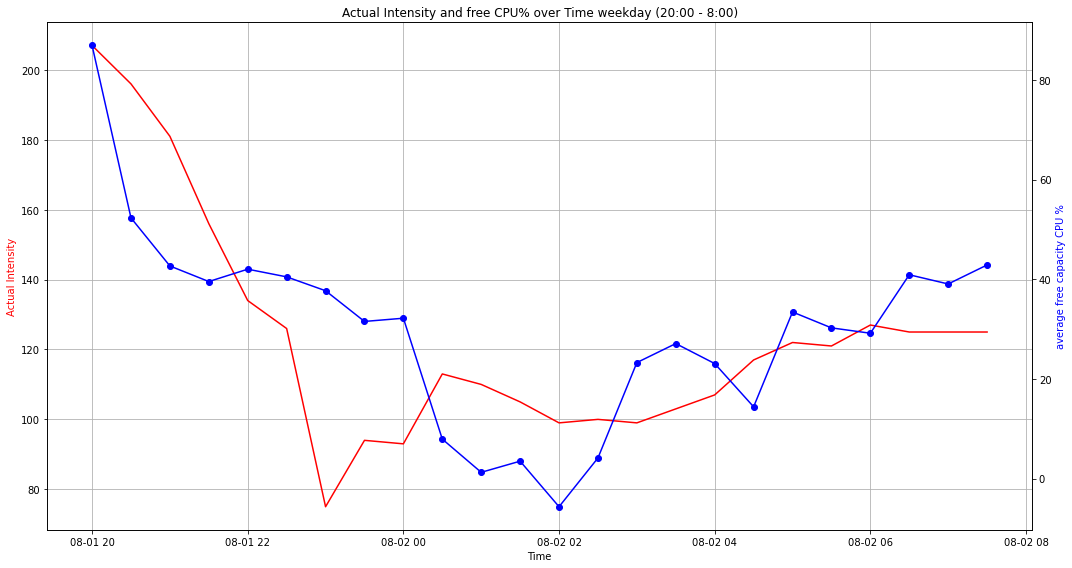

In [466]:
# Create the first plot for "Actual Intensity"
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot "Actual Intensity" on the left y-axis
ax1.plot(random_night_data['from'], random_night_data['actual_intensity'], color='r')
ax1.set_xlabel('Time')
ax1.set_ylabel('Actual Intensity', color='r')
ax1.set_title('Actual Intensity and free CPU% over Time weekday (20:00 - 8:00)')
ax1.grid(True)

# Create the second plot for "Reserved CPU%"
ax2 = ax1.twinx()

ax2.plot(average_free_capacity.index, average_free_capacity.values, marker='o',color='b')
ax2.set_ylabel('average free capacity CPU %', color='b')

# Show the combined plot
plt.tight_layout()
plt.show()

## random weekend (8:00 - 20:00)

In [284]:
average_df = result[['timestamp','free_capacity']]

# 转换timestamp为正值
average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]

# 转换timestamp为日期时间
base_time = pd.Timestamp('2022-08-06T08:00Z')
average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]

# 将datetime列设置为索引
average_df['datetime'] = pd.to_datetime(average_df['datetime'])

# 筛选出8点到20点之间的数据
average_df = average_df[(average_df['datetime'].dt.hour >= 8) & (average_df['datetime'].dt.hour < 20)]

average_df.set_index('datetime', inplace=True)

# 按照半小时间隔计算平均值
average_free_capacity = average_df['free_capacity'].resample('30T').mean()

/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/2631405358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/2631405358.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_2898/26314

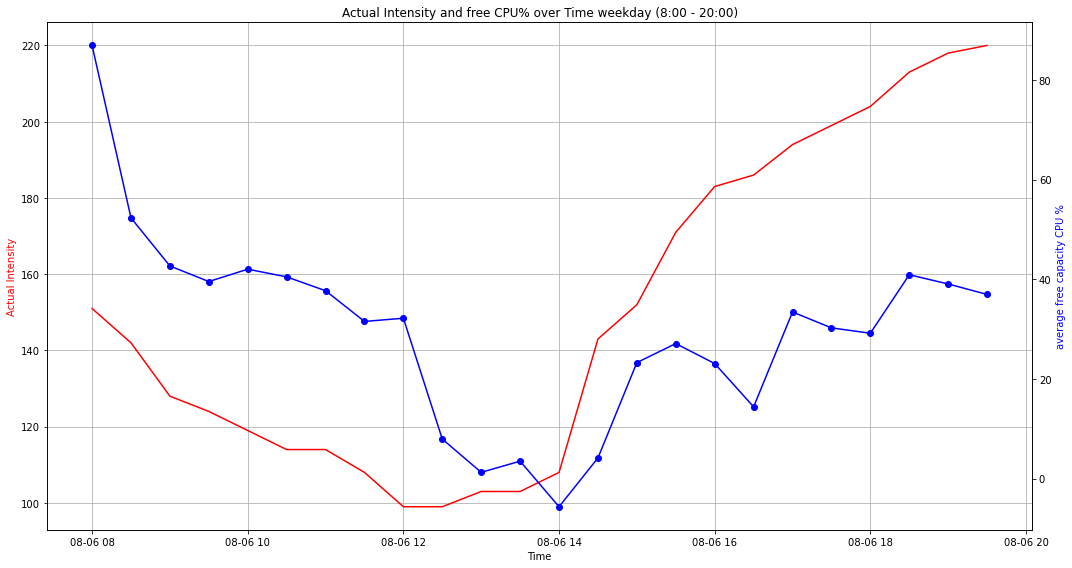

In [285]:
# Create the first plot for "Actual Intensity"
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot "Actual Intensity" on the left y-axis
ax1.plot(random_weekend_data['from'], random_weekend_data['actual_intensity'], color='r')
ax1.set_xlabel('Time')
ax1.set_ylabel('Actual Intensity', color='r')
ax1.set_title('Actual Intensity and free CPU% over Time weekday (8:00 - 20:00)')
ax1.grid(True)

# Create the second plot for "Reserved CPU%"
ax2 = ax1.twinx()



ax2.plot(average_free_capacity.index, average_free_capacity.values, marker='o',color='b')
ax2.set_ylabel('average free capacity CPU %', color='b')

# Show the combined plot
plt.tight_layout()
plt.show()

## random weekend night (20:00 - 8:00)

In [26]:
average_df = result[['timestamp','free_capacity']]
# 转换timestamp为正值
average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]

# 转换timestamp为日期时间
base_time = pd.Timestamp('2022-08-27T20:00Z')
average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]

# 将datetime列设置为索引
average_df['datetime'] = pd.to_datetime(average_df['datetime'])

average_df.set_index('datetime', inplace=True)

end_time = pd.Timestamp('2022-08-28 08:00:00')
average_df = average_df.loc[:end_time]
# 按照半小时间隔计算平均值
average_free_capacity = average_df['free_capacity'].resample('30T').mean()

/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20026/1628159610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20026/1628159610.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20026/16

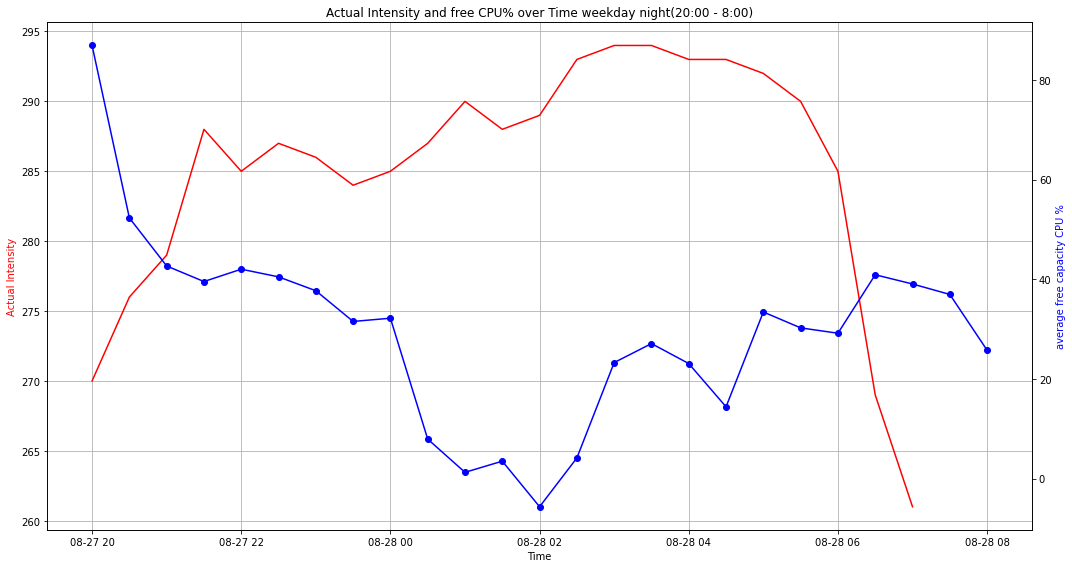

In [27]:
# Create the first plot for "Actual Intensity"
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot "Actual Intensity" on the left y-axis
ax1.plot(random_weekend_night_data['from'], random_weekend_night_data['actual_intensity'], color='r')
ax1.set_xlabel('Time')
ax1.set_ylabel('Actual Intensity', color='r')
ax1.set_title('Actual Intensity and free CPU% over Time weekday night(20:00 - 8:00)')
ax1.grid(True)

# Create the second plot for "Reserved CPU%"
ax2 = ax1.twinx()



ax2.plot(average_free_capacity.index, average_free_capacity.values, marker='o',color='b')
ax2.set_ylabel('average free capacity CPU %', color='b')

# Show the combined plot
plt.tight_layout()
plt.show()